### Импорт библиотек

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Импорт данных

In [335]:
data = pd.read_csv('AB_NYC_2019.csv')

In [336]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [337]:
print(f'Строк в наборе данных: {data.shape[0]}, столбцов {data.shape[1]}')

Строк в наборе данных: 48895, столбцов 16


### EDA

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Уберем ненужные признаки

На данном этапе нас не интересуют данные об арендадателе, арендаторе и информации о последнем ревью

In [339]:
data = data.drop(['id','name','host_id', 'host_name', 'last_review'], axis=1)

#### Выведем количество нулевых значений по каждому столбцу

In [340]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Ниже вы можете увидеть, что у признака reviews_per_month нет значений, только в том случае, когда у объекта вовсе нет отзывов(number_of_reviews=0).

In [341]:
data[data['reviews_per_month'].isnull()]['number_of_reviews'].describe()

count    10052.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: number_of_reviews, dtype: float64

Заполним пропущенные значения переменных в этой колонке значением, равным нулю

In [342]:
data.fillna({'reviews_per_month':0}, inplace=True)

Заново проверим количество пропущенных значений у этого признака:

In [343]:
data.reviews_per_month.isnull().sum()

0

Посмотрим на основные характеристики числовых признаков:

In [344]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

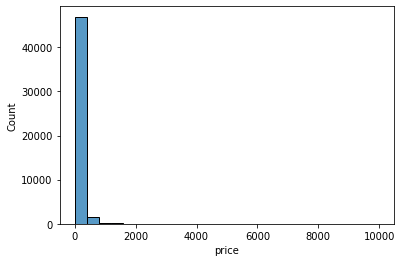

In [345]:
sns.histplot(data['price'], bins=25)

Мы видим выбросы значений у целевой переменной. Очистим стрики с ними:

In [346]:
low = .05
high = .95
quant = data.quantile([low, high])
print(quant)

       latitude  longitude  price  minimum_nights  number_of_reviews  \
0.05  40.646114 -74.003880   40.0             1.0                0.0   
0.95  40.825643 -73.865771  355.0            30.0              114.0   

      reviews_per_month  calculated_host_listings_count  availability_365  
0.05               0.00                             1.0               0.0  
0.95               4.31                            15.0             359.0  


In [347]:
data = data[data.price.between(quant.loc[low, 'price'], quant.loc[high, 'price'])]
data.shape

(44412, 11)

In [348]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000,44412.000000
mean,40.729198,-73.952173,126.721066,6.847947,24.100603,1.108867,6.692020,109.308002
std,0.054349,0.045547,70.919013,20.017732,45.499870,1.611001,31.654081,130.085501
min,40.499790,-74.244420,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690190,-73.982640,70.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,40.722820,-73.955400,105.000000,2.000000,6.000000,0.390000,1.000000,40.000000
75%,40.763562,-73.936988,165.000000,5.000000,25.000000,1.620000,2.000000,216.000000
max,40.913060,-73.712990,355.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

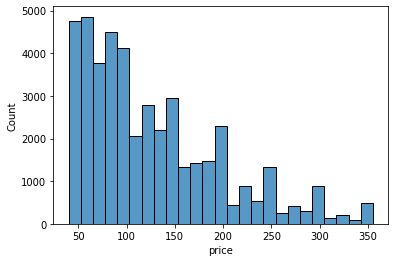

In [349]:
sns.histplot(data['price'], bins=25)

Посмотрим в каких районах цены на аренду недвижимости выше:

In [350]:
districts = data.groupby(['neighbourhood_group'])['price'].mean()

<BarContainer object of 5 artists>

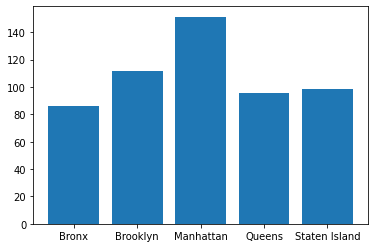

In [351]:
plt.bar(districts.index, districts.values)

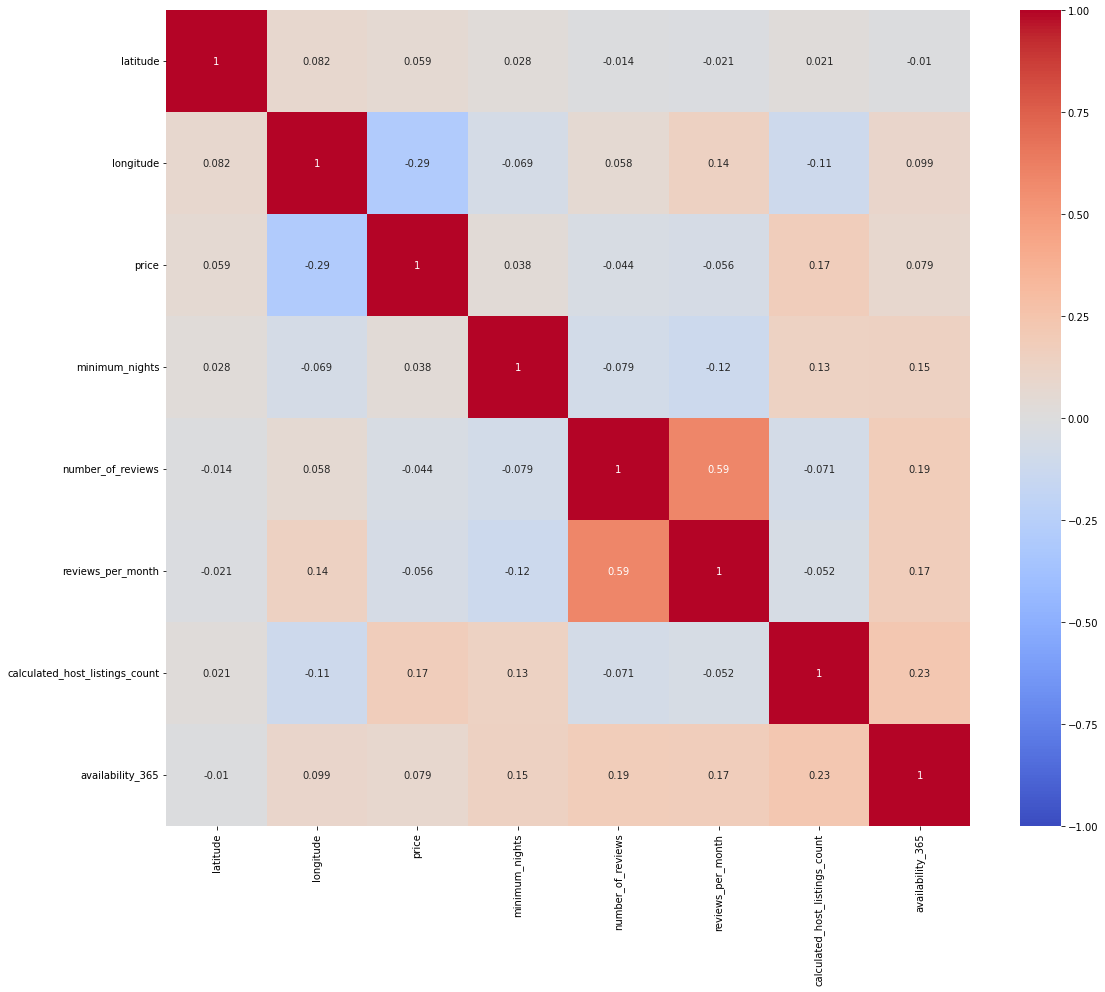

In [352]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, vmin=-1, center=0)
plt.show()

### Feature engineering

Признаки **neighbourhood_group** и **room_type** перекодируем при помощи dummy encoding

In [353]:
data_1 = data.copy()
data_1 = pd.get_dummies(data_1, columns=['room_type', 'neighbourhood_group'], drop_first=True)

Закодируем значение признака **neighbourhood**. В качестве значения признака возьмем среднее значение целевой переменной.

In [354]:
def mean_target_encoding(df, target, column):
    mean_enc = df.groupby(column)[target].mean()
    df[column+'_m_enc'] = df[column].map(mean_enc)
    return (df)

data_1 = mean_target_encoding(data_1, 'price', 'neighbourhood')
data_1.drop(columns = ['neighbourhood'], axis =1, inplace=True)
data_1.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_m_enc
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,1,0,0,0,91.980645
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,0,1,0,0,190.532618
2,40.80902,-73.94190,150,3,0,0.00,1,365,1,0,0,1,0,0,107.511933
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,0,1,0,0,0,128.680970
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,0,1,0,0,115.956279


### Построим базовую модель:

In [355]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def rmse(y_hat, y):
    return np.sqrt(mean_squared_error(y_hat, y))

Разделим целевую переменную и признаки:

In [356]:
target_base = data_1.price
features_base = data_1.drop('price', axis=1)

Разделим выборку на train и test:

In [357]:
X_train, X_test, y_train, y_test = train_test_split(
    features_base, target_base, test_size=0.30, random_state=118
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31088, 14), (13324, 14), (31088,), (13324,))

In [358]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', StandardScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results0 = {'R2':[], 'MAE': [], 'RMSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results0['R2'].append(r2_score(y_test, preds))
    results0['MAE'].append(mean_absolute_error(y_test, preds))
    results0['RMSE'].append(rmse(y_test, preds))

res = pd.DataFrame(results0, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,RMSE
Linear,0.478462,37.173400,51.467972
Ridge,0.478463,37.173321,51.467922
Lasso,0.477138,37.241102,51.533237
ElasticNetCV,0.478237,37.178612,51.479057


### Попробуем улучшить модель

#### Шаг 1

Посмотрим распределение объектов по группам признаков района и типа проживания:

In [359]:
sub1 = data.groupby(['neighbourhood_group','room_type'])['price'].count()
sub1 = sub1.sort_values(ascending=False)
sub1

neighbourhood_group  room_type      
Manhattan            Entire home/apt    11604
Brooklyn             Private room        9259
                     Entire home/apt     9062
Manhattan            Private room        7595
Queens               Private room        2985
                     Entire home/apt     2027
Bronx                Private room         524
Manhattan            Shared room          396
Bronx                Entire home/apt      362
Staten Island        Entire home/apt      168
Brooklyn             Shared room          167
Staten Island        Private room         144
Queens               Shared room           85
Bronx                Shared room           30
Staten Island        Shared room            4
Name: price, dtype: int64

Мы понимает что зависимость от минимального срока проживания не линейная. Разделим на 5 групп по срокам сдачи недвижимости:

    - суточно (Daily)    
    - на короткий срок (Short)
    - от недели (Week)
    - от месяца (Monthly)
    - долгосрочно (Long)
    

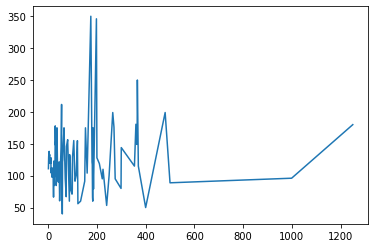

In [360]:
plt.plot(data.groupby(['minimum_nights'])['price'].mean())

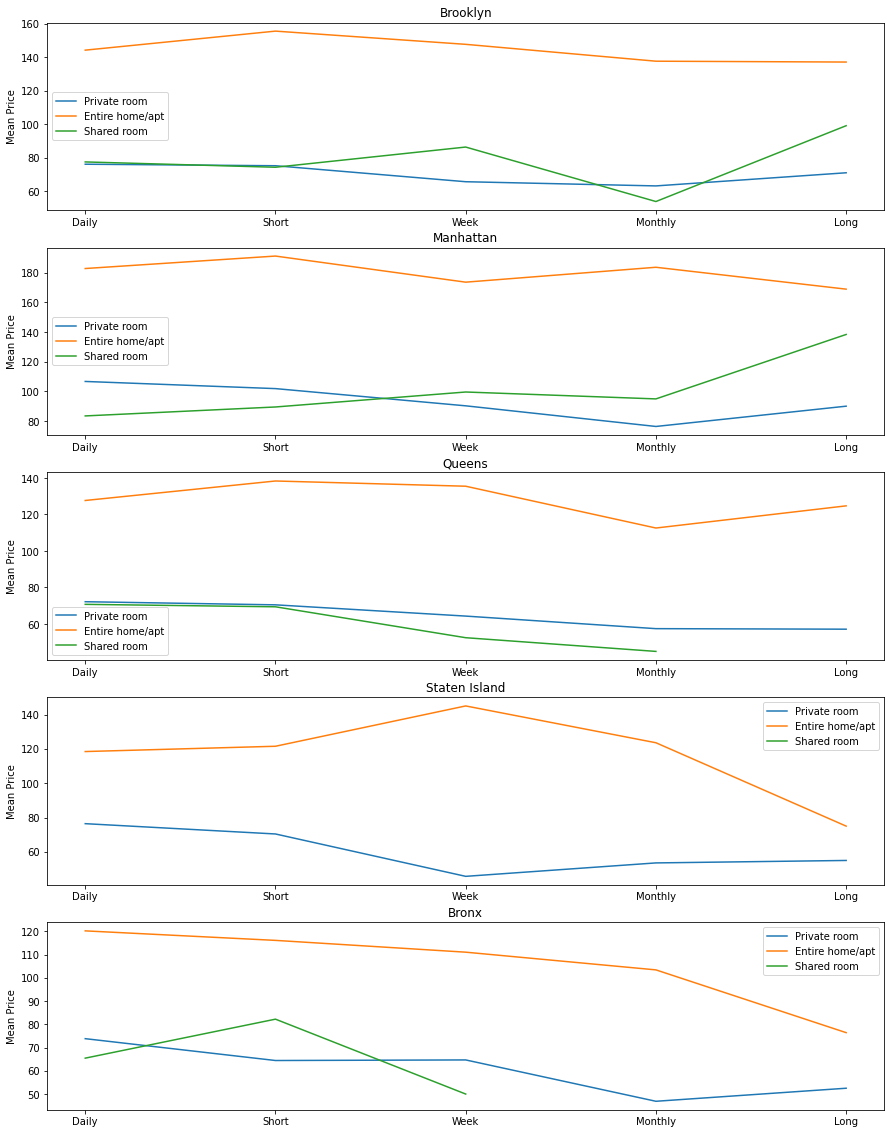

In [361]:
data2 = data.copy()
category_of_rent_bins = pd.Series([0, 1, 6, 10, 30, 2000])
data2['duration_of_rent'] = pd.cut(data2['minimum_nights'],
                                category_of_rent_bins, 
                                labels =['Daily','Short','Week','Monthly', "Long"], 
                                right=True, include_lowest=True)
plt.figure(figsize=(15, 20))
for k, district in enumerate(data2.neighbourhood_group.unique()):
    plt.subplot(5,1,k+1)
    for roomtype in data2.room_type.unique():
        sub1 = data2[data2['neighbourhood_group']==district]
        sub1 = sub1[sub1['room_type']==roomtype]
        sub1 = sub1.groupby(['duration_of_rent'])['price'].mean()
        plt.plot(sub1, label=roomtype)
    plt.title(district)
    plt.ylabel('Mean Price')
    plt.legend()

Для каждого района и типа жилья разная зависимость от срока пребывания и это логично. 
Жилье на сутки обычно более низкого качества, поэтому в среднем оно дешевле чем на короткий срок. Но оно дороже, чем цена сдачи недвижимости на долгий срок. 

Мы не видим огромного спада цены на долгосрочную аренду, потому что квартиры на срок от 30 дней сдаются преимущественно легально, и по ним выплачиваются большие налоги в отличие от нелегальных краткосрочных сдач. 

Закодируем значение признака **duration_of_rent**. В качестве значения признака возьмем среднее значение целевой переменной:

In [362]:
data2 = mean_target_encoding(data2, 'price', 'duration_of_rent')
data2['duration_of_rent_m_enc'] = pd.to_numeric(data2['duration_of_rent_m_enc'], errors='coerce')
data2

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,duration_of_rent,duration_of_rent_m_enc
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Daily,110.901957
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Daily,110.901957
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,Short,132.392470
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Daily,110.901957
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Week,121.903707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,Short,132.392470
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,Short,132.392470
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,Week,121.903707
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,Daily,110.901957


Проделаем аналогичные действия как с базовой моделью: 

In [364]:
data2 = mean_target_encoding(data2, 'price', 'neighbourhood')
data2.drop(columns = ['neighbourhood', 'duration_of_rent', 'minimum_nights'], axis =1, inplace=True)

In [365]:
data2 = pd.get_dummies(data2, columns=['room_type', 'neighbourhood_group'], drop_first=True)

In [366]:
data2.head()

,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,duration_of_rent_m_enc,neighbourhood_m_enc,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,149,9,0.21,6,365,110.901957,91.980645,1,0,1,0,0,0
1,40.75362,-73.98377,225,45,0.38,2,355,110.901957,190.532618,0,0,0,1,0,0
2,40.80902,-73.94190,150,0,0.00,1,365,132.392470,107.511933,1,0,0,1,0,0
3,40.68514,-73.95976,89,270,4.64,1,194,110.901957,128.680970,0,0,1,0,0,0
4,40.79851,-73.94399,80,9,0.10,1,0,121.903707,115.956279,0,0,0,1,0,0


Разделим целевую переменную и признаки:

In [367]:
target = data2.price
features = data2.drop('price', axis=1)

Разделим выборку на train и test:

In [368]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=118
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31088, 14), (13324, 14), (31088,), (13324,))

In [369]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', StandardScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results1 = {'R2':[], 'MAE': [], 'RMSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results1['R2'].append(r2_score(y_test, preds))
    results1['MAE'].append(mean_absolute_error(y_test, preds))
    results1['RMSE'].append(rmse(y_test, preds))

res = pd.DataFrame(results1, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,RMSE
Linear,0.476081,37.293274,51.585326
Ridge,0.476082,37.293183,51.585286
Lasso,0.474201,37.360810,51.677795
ElasticNetCV,0.475625,37.295085,51.607769


#### Шаг 2

Результат незначительно ухудшился. Попробуем всесто разделения на группы взять логарифм от показателя минимального количества дней проживания.  

In [370]:
data3 = data.copy()
data3['minimum_nights'] += 0.000000001
data3['minimum_nights'] = np.log10(data3['minimum_nights'])

In [371]:
data3 = mean_target_encoding(data3, 'price', 'neighbourhood')
data3.drop(columns = ['neighbourhood'], axis =1, inplace=True)

In [373]:
data3 = pd.get_dummies(data3, columns=['room_type', 'neighbourhood_group'], drop_first=True)

In [374]:
data3.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_m_enc,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,149,4.342945e-10,9,0.21,6,365,91.980645,1,0,1,0,0,0
1,40.75362,-73.98377,225,4.342945e-10,45,0.38,2,355,190.532618,0,0,0,1,0,0
2,40.80902,-73.94190,150,4.771213e-01,0,0.00,1,365,107.511933,1,0,0,1,0,0
3,40.68514,-73.95976,89,4.342945e-10,270,4.64,1,194,128.680970,0,0,1,0,0,0
4,40.79851,-73.94399,80,1.000000e+00,9,0.10,1,0,115.956279,0,0,0,1,0,0


In [375]:
target = data3.price
features = data3.drop('price', axis=1)

Разделим выборку на train и test:

In [376]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=118
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31088, 14), (13324, 14), (31088,), (13324,))

In [378]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', StandardScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results2 = {'R2':[], 'MAE': [], 'RMSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results2['R2'].append(r2_score(y_test, preds))
    results2['MAE'].append(mean_absolute_error(y_test, preds))
    results2['RMSE'].append(rmse(y_test, preds))

res = pd.DataFrame(results2, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,RMSE
Linear,0.487683,36.912413,51.010944
Ridge,0.487684,36.912296,51.010919
Lasso,0.483904,36.977740,51.198767
ElasticNetCV,0.486658,36.900523,51.061947


Отлично! Нам удалось улучшить результат. Идем дальше.

#### Шаг 3

Создадим новый параметр - расстояние до центра. Будем использовать данный параметр, вместо значений широты и долготы объекта.
В качестве центра будем использовать координаты Площади Колумба.

In [379]:
lat0 = 40.76749693
long0 = -73.97582943
data4 = data3.copy()
data4['distance'] = np.sqrt((lat0 - data4['latitude'])**2 + (long0 - data4['longitude'])**2)
data4.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_m_enc,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance
0,40.64749,-73.97237,149,4.342945e-10,9,0.21,6,365,91.980645,1,0,1,0,0,0,0.120057
1,40.75362,-73.98377,225,4.342945e-10,45,0.38,2,355,190.532618,0,0,0,1,0,0,0.015988
2,40.80902,-73.94190,150,4.771213e-01,0,0.00,1,365,107.511933,1,0,0,1,0,0,0.053622
3,40.68514,-73.95976,89,4.342945e-10,270,4.64,1,194,128.680970,0,0,1,0,0,0,0.083910
4,40.79851,-73.94399,80,1.000000e+00,9,0.10,1,0,115.956279,0,0,0,1,0,0,0.044447


Так же попробуем взять в качестве отправной точки - координаты Times Square

In [380]:
latTS = 40.757355
longTS = -73.98604
data4['distanceTS'] = np.sqrt((latTS - data4['latitude'])**2 + (longTS - data4['longitude'])**2)
data4.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_m_enc,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,distance,distanceTS
0,40.64749,-73.97237,149,4.342945e-10,9,0.21,6,365,91.980645,1,0,1,0,0,0,0.120057,0.110712
1,40.75362,-73.98377,225,4.342945e-10,45,0.38,2,355,190.532618,0,0,0,1,0,0,0.015988,0.004371
2,40.80902,-73.94190,150,4.771213e-01,0,0.00,1,365,107.511933,1,0,0,1,0,0,0.053622,0.067953
3,40.68514,-73.95976,89,4.342945e-10,270,4.64,1,194,128.680970,0,0,1,0,0,0,0.083910,0.076848
4,40.79851,-73.94399,80,1.000000e+00,9,0.10,1,0,115.956279,0,0,0,1,0,0,0.044447,0.058838


Построим heatmap матрицы коррелиации:

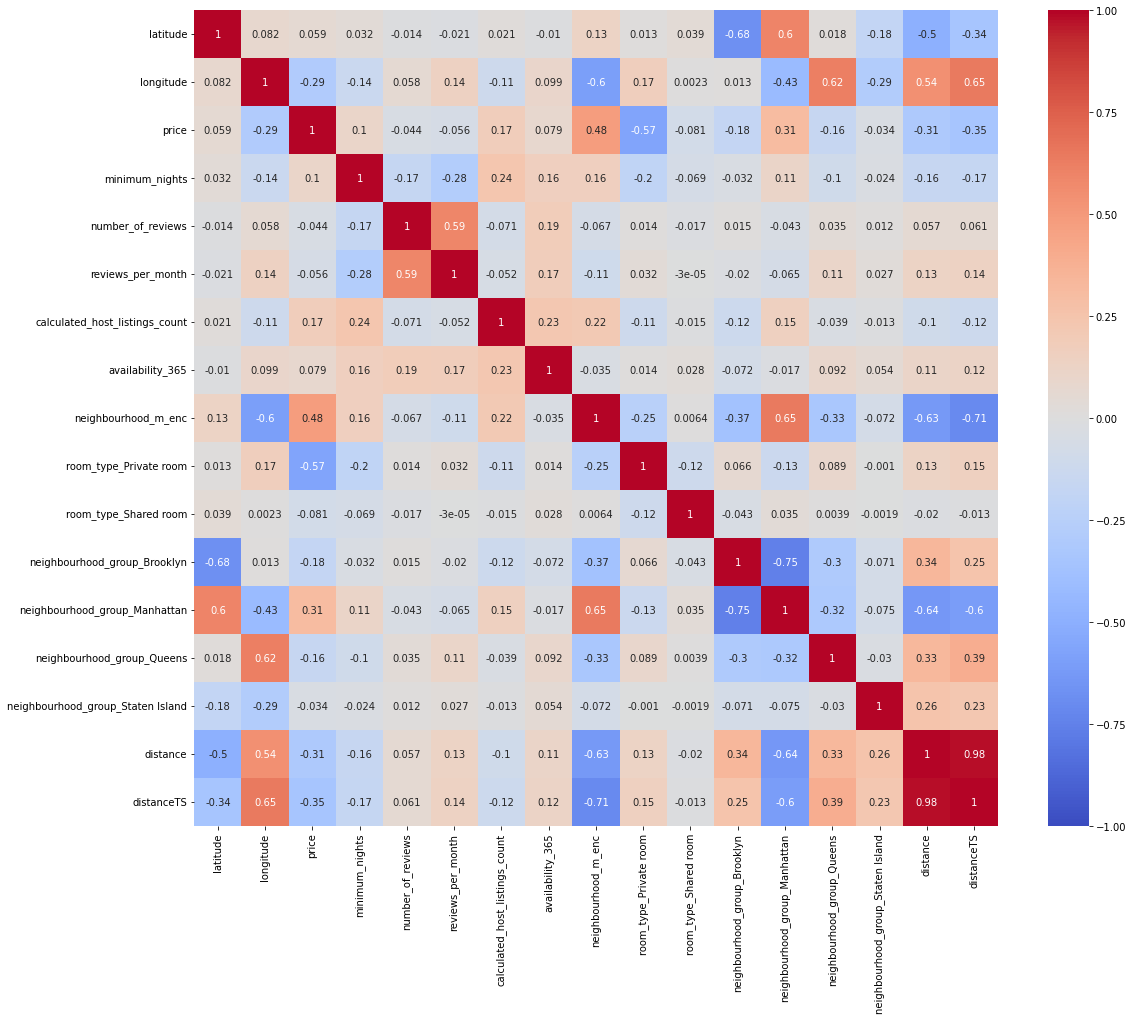

In [381]:
plt.subplots(figsize=(18,15))
sns.heatmap(data4.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, vmin=-1, center=0)
plt.show()

Как мы видим дистанция от второй точки лучше коррелирует с целевой переменной, оставим этот параметр:

In [382]:
data4.drop(columns = ['distance', 'latitude', 'longitude'], axis =1, inplace=True)

Разделим целевую переменную и признаки:

In [383]:
target = data4.price
features = data4.drop('price', axis=1)

Разделим выборку на train и test:

In [384]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=118
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31088, 13), (13324, 13), (31088,), (13324,))

In [385]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])
pipe_elastic = Pipeline([('scaler', StandardScaler()), ('elasticnetCV', ElasticNetCV())])

pipe_lr.fit(X_train, y_train)
preds_lr = pipe_lr.predict(X_test)

pipe_ridge.fit(X_train, y_train)
preds_ridge = pipe_ridge.predict(X_test)

pipe_lasso.fit(X_train, y_train)
preds_lasso = pipe_lasso.predict(X_test)

pipe_elastic.fit(X_train, y_train)
preds_elast = pipe_elastic.predict(X_test)



results3 = {'R2':[], 'MAE': [], 'RMSE': []}
for preds in [preds_lr, preds_ridge, preds_lasso, preds_elast]:
    results3['R2'].append(r2_score(y_test, preds))
    results3['MAE'].append(mean_absolute_error(y_test, preds))
    results3['RMSE'].append(rmse(y_test, preds))

res = pd.DataFrame(results3, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res

,R2,MAE,RMSE
Linear,0.489134,36.836527,50.938668
Ridge,0.489134,36.836492,50.938664
Lasso,0.486698,36.872758,51.059950
ElasticNetCV,0.488375,36.847700,50.976505


Нам удалось еще немножко улучшить результат. Ниже результаты baseline модели: 

In [386]:
res0 = pd.DataFrame(results0, index = ['Linear', 'Ridge', 'Lasso', 'ElasticNetCV'])
res0

,R2,MAE,RMSE
Linear,0.478462,37.173400,51.467972
Ridge,0.478463,37.173321,51.467922
Lasso,0.477138,37.241102,51.533237
ElasticNetCV,0.478237,37.178612,51.479057


Низкие метрики качества вполне логичны, так как у нас наблюдается огромная дисперсия и недостаток признаков, для эффективного определения цены аренды жилья (площадь объекта, количество спальных мест и т.д.) Значение дисперсии вы можете увидеть ниже:   

In [388]:
data.var()['price']

<ipython-input-388-fb438e47cb4e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()['price']


5029.506396394953

### Построим модель случайного леса:

Подберем гиперпараметры:

In [395]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 500], 'max_features' : [None, 5, 10, 15], 'max_depth':[5, 10]}
model = RandomForestRegressor()
rfr = GridSearchCV(model, parameters, scoring = 'r2')
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

print('Best parameters: ', rfr.best_params_)

Best parameters:  {'max_depth': 10, 'max_features': None, 'n_estimators': 500}


Построим модель на основе гиперпараметров:

In [396]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10, n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)
preds_rfr = rfr.predict(X_test)
print('R2', r2_score(y_test, preds_rfr))
print('MAE', mean_absolute_error(y_test, preds_rfr))
print('RMSE', rmse(y_test, preds_rfr))

R2 0.5473952953085681
MAE 34.00157815914862
RMSE 47.94613463102616


Мы получили наилучший результат. Посмотрим на важность каждого признака.

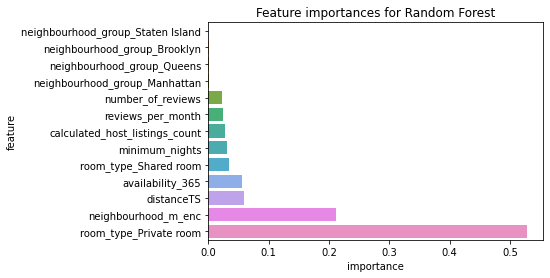

In [397]:
feature_importances = zip(X_train.columns, rfr.feature_importances_)
feature_importances = sorted(feature_importances, key=lambda x: x[1])
feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

plt.title('Feature importances for Random Forest')
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.show()